In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from scipy import cluster

In [7]:
### Load bank dataset

data = pd.read_csv("bank2.txt", sep = "\s+", header=None)

xx = data.sample(n = 20, random_state = 11, replace=False)

mean = np.mean(xx)
m = np.array([mean]*len(xx))
x = xx - m
eva = np.linalg.eig(np.cov(x.T))[0]
eve = np.linalg.eig(np.cov(x.T))[1]
y = x @ eve
ym = y.iloc[:, 0:2]

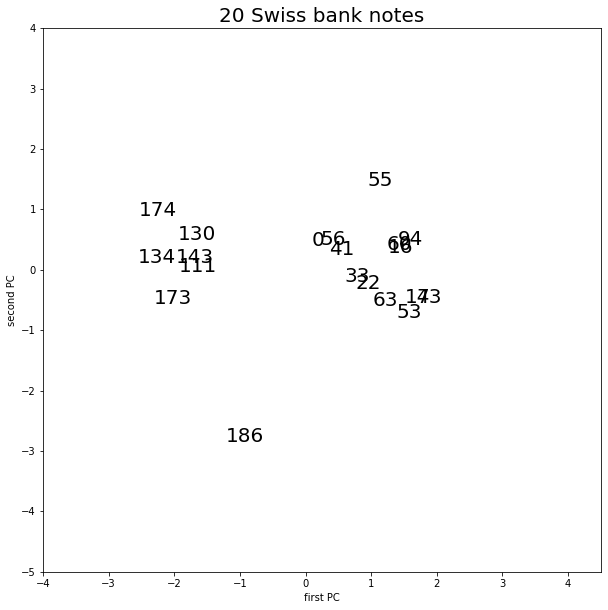

In [8]:
### PCA for 20 randomly chosen bank notes

fig, ax = plt.subplots(figsize = (10, 10))
ax.scatter(ym[0], ym[1], c = "w")
for i in range(0, len(ym)):
    ax.text(ym.iloc[i,0]-0.1, ym.iloc[i,1]-0.07, xx.index[i], fontsize = 20)
ax.set_xlabel("first PC")
ax.set_ylabel("second PC")
ax.set_ylim(-5, 4)
ax.set_xlim(-4, 4.5)
ax.set_title("20 Swiss bank notes", fontsize = 20)

plt.show()

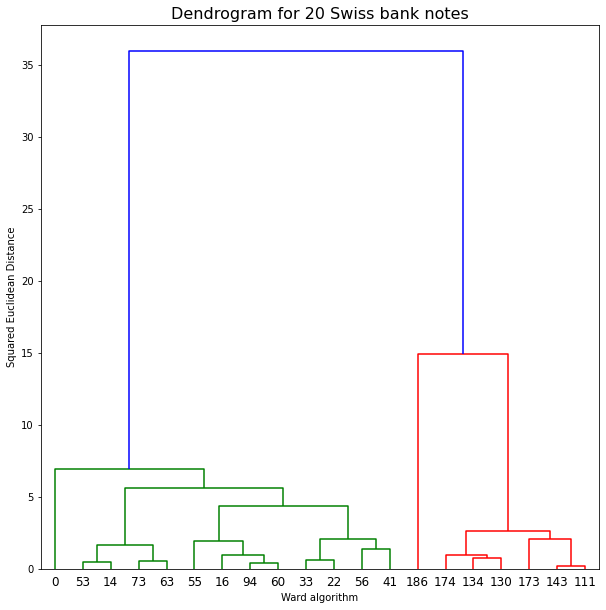

In [9]:
### The dendrogram for the 20 bank notes after applying the Ward algorithm

d = np.zeros([len(xx),len(xx)])

for i in range(0, len(xx)):
    for j in range(0, len(xx)):
        d[i, j] = np.linalg.norm(xx.iloc[i, :] - xx.iloc[j, :])

dd = (d**2)

ddd  = dd[1:, :-1][:, 0]
for i in range(1, len(xx)-1):
    ddd = np.concatenate((ddd, dd[1:, :-1][i:, i]))
    
w = cluster.hierarchy.linkage(ddd, 'ward')


fig, ax = plt.subplots(figsize = (10, 10))
h = cluster.hierarchy.dendrogram(w, labels=xx.index)
plt.title("Dendrogram for 20 Swiss bank notes", fontsize = 16)
plt.ylabel("Squared Euclidean Distance")
plt.xlabel("Ward algorithm")

plt.show()

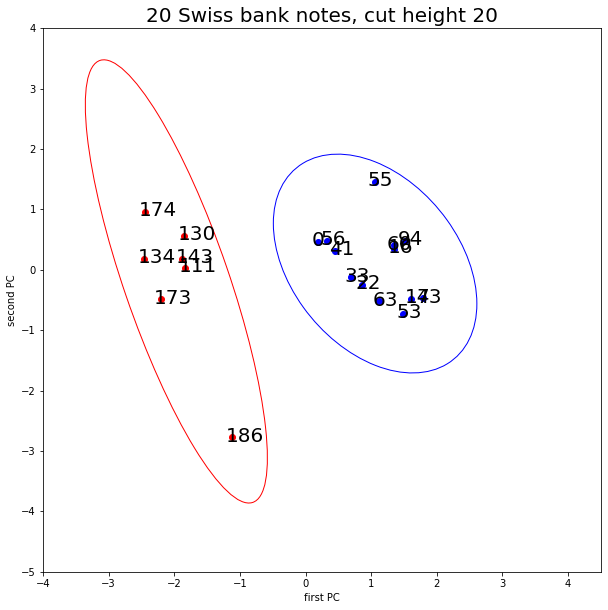

In [10]:
### PCA with clusters

groups = cluster.hierarchy.cut_tree(w, height=20)

merg = np.concatenate((ym, groups), axis = 1)

merg = pd.DataFrame(merg).sort_values(by = 2)

merg1 = merg.iloc[:len(merg[merg.iloc[:, 2] == 0]), :2]
merg2 = merg.iloc[len(merg[merg.iloc[:, 2] == 0]):, :2]

covm = np.cov(merg1.iloc[:, 0], merg1.iloc[:, 1])
covm1 = np.cov(merg2.iloc[:, 0], merg2.iloc[:, 1])

eigva = np.sqrt(np.linalg.eig(covm)[0])
eigve = np.linalg.eig(covm)[1]
eigva1 = np.sqrt(np.linalg.eig(covm1)[0])
eigve1 = np.linalg.eig(covm1)[1]


fig, ax = plt.subplots(figsize = (10, 10))
ax.scatter(ym[0], ym[1], c = "w")
for i in range(0, len(ym)):
    ax.text(ym.iloc[i,0]-0.1, ym.iloc[i,1]-0.07, xx.index[i], fontsize = 20)

ax.add_patch(Ellipse(xy = (np.mean(merg1.iloc[:, 0]), np.mean(merg1.iloc[:, 1])),
                     width = eigva[0]*3*2, height = eigva[1]*3*2,
                     angle = -np.rad2deg(np.arccos(eigve[0, 0])), facecolor = "w", edgecolor = "r", zorder = 0))

ax.add_patch(Ellipse(xy = (np.mean(merg2.iloc[:, 0]), np.mean(merg2.iloc[:, 1])),
                     width = eigva1[0]*3*2, height = eigva1[1]*3*2,
                     angle = -np.rad2deg(np.arccos(eigve1[0, 0])), facecolor = "w", edgecolor = "b", zorder = 0))

ax.scatter(merg1.iloc[:, 0], merg1.iloc[:, 1], c = "r")
ax.scatter(merg2.iloc[:, 0], merg2.iloc[:, 1], c = "b")

ax.set_xlabel("first PC")
ax.set_ylabel("second PC")
ax.set_ylim(-5, 4)
ax.set_xlim(-4, 4.5)
ax.set_title("20 Swiss bank notes, cut height 20", fontsize = 20)

plt.show()